In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
cars=pd.read_csv('used_cars.csv')
cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [3]:
cars['price']=cars['price'].str.replace('$','',regex=False)
cars['price']=cars['price'].str.replace(',','',regex=False)

In [4]:
cars['price']=pd.to_numeric(cars['price'])

In [5]:
Lcars=cars.groupby('model_year')
Lcars= Lcars.price.mean().reset_index()
Lcars

,model_year,price
0,1974,115000.000000
1,1992,11500.000000
2,1993,22522.111111
3,1994,7539.857143
4,1995,25665.333333
5,1996,22437.375000
6,1997,11611.000000
7,1998,12670.818182
8,1999,12084.666667
9,2000,13002.882353


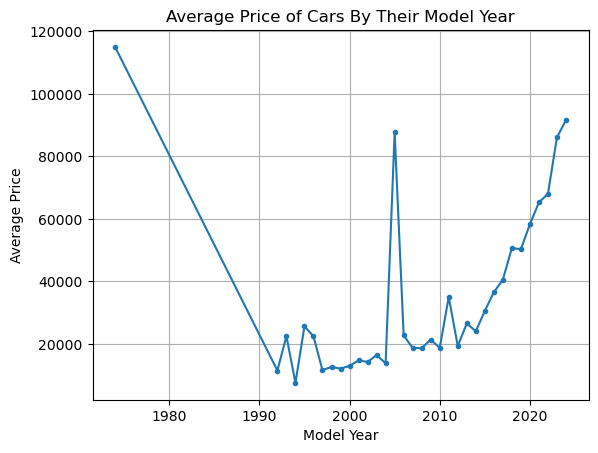

In [6]:
plt.plot(Lcars.model_year,Lcars.price,'.-')
plt.title('Average Price of Cars By Their Model Year')
plt.ylabel('Average Price')
plt.xlabel('Model Year')
plt.grid()
plt.show()

In [7]:
#Hcars=cars.groupby('price').count().reset_index()
Hcars = cars.groupby('price').size().reset_index(name='Number_of_Cars')

Hcars

,price,Number_of_Cars
0,2000,1
1,2300,2
2,2500,4
3,2800,1
4,2899,1
...,...,...
1564,695000,1
1565,749950,1
1566,1599000,1
1567,1950995,1


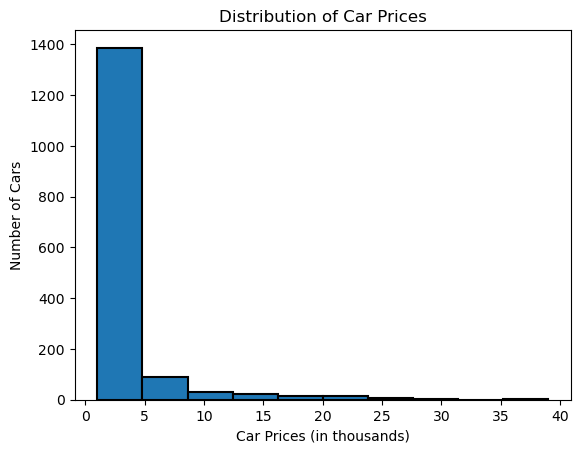

In [8]:
bins=[0,5,10,15,20,25,30,35,40]

plt.hist(Hcars.Number_of_Cars,edgecolor='black', linewidth=1.5)
plt.xlabel('Car Prices (in thousands)')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Prices')
#plt.xticks(bins)
plt.show()

In [9]:
cars['milage']=cars['milage'].str.replace('mi.','',regex=False)
cars['milage']=cars['milage'].str.replace(',','',regex=False)


In [10]:
cars['milage']=pd.to_numeric(cars['milage'])

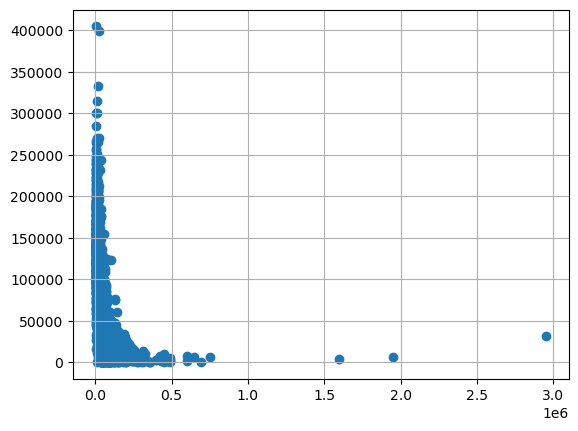

In [11]:
plt.scatter(cars.price,cars.milage)
plt.grid()
plt.show()

In [46]:
H2cars = cars.groupby('price').size().reset_index(name='Number_of_Cars')
H2cars.sort_values('price', ascending=False)
H2cars=H2cars.head(10)
H2cars

,price,Number_of_Cars
0,2000,1
1,2300,2
2,2500,4
3,2800,1
4,2899,1
5,2900,1
6,2990,1
7,3000,4
8,3200,2
9,3499,1


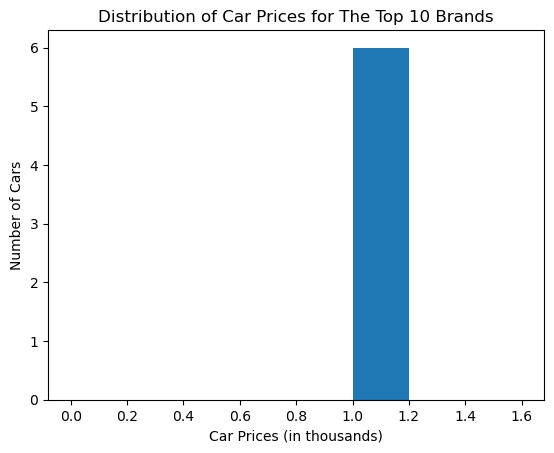

In [57]:
bins=[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
bar_labels = ["red", "blue", "_red", "orange"]
bar_colors = ["tab:red", "tab:blue", "tab:red", "tab:orange"]

h2=plt.hist(H2cars['Number_of_Cars'], bins=bins ,stacked=True)
plt.xlabel('Car Prices (in thousands)')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Prices for The Top 10 Brands')
#plt.xticks(bins)
plt.show()

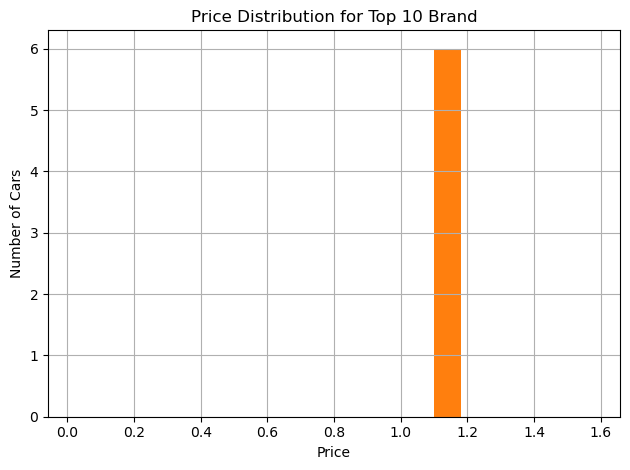

In [41]:
bins=[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
plt.hist(H2cars,bins=bins)
plt.ylabel('Number of Cars')
plt.xlabel('Price')
plt.title('Price Distribution for Top 10 Brand')
plt.grid()
plt.tight_layout() 
plt.show()

In [ ]:
df=pd.read_csv
data=df['Quantitiy']
bins=np.arange(min(data),max(data)+1,1)
x=df.loc[df['segment']]=='1']
y=df.loc[df['segment']]=='2']
z=df.loc[df['segment']]=='Home Office']
plt.hsit(x['Quantity']),bins)
plt.hsit(y['Quantity']),bins)
plt.hsit(z['Quantity']),bins)
plt.show()

In [26]:

B2cars=cars.groupby('brand')
B2cars= B2cars.price.mean().reset_index()
B2cars['price']=pd.to_numeric(cars['price'])
B2cars.sort_values('price', ascending=False)
B2cars=B2cars.head(10)
B2cars

,brand,price
0,Acura,10300
1,Alfa,38005
2,Aston,54598
3,Audi,15500
4,BMW,34999
5,Bentley,14798
6,Bugatti,31000
7,Buick,7300
8,Cadillac,41927
9,Chevrolet,69950


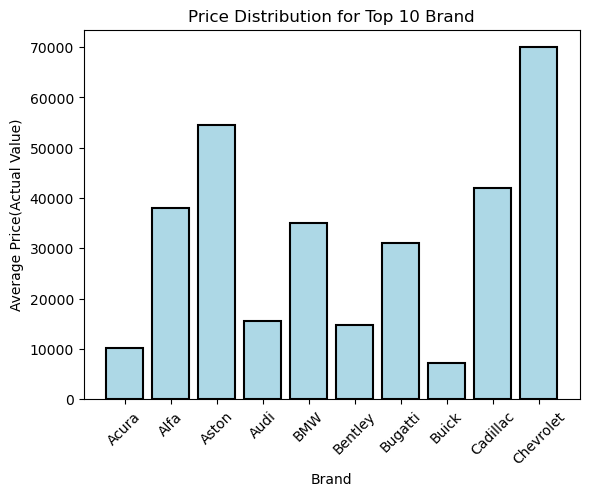

In [27]:
plt.bar(B2cars.brand,B2cars.price, color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Brand')
plt.ylabel('Average Price(Actual Value)')
plt.title('Price Distribution for Top 10 Brand')
plt.xticks(rotation=45)

plt.show()